## **Twitter Emotion Recognition using RNN**

---

[Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)


## 1. Installing Hugging Face's nlp package

In [1]:
!pip install nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.7 MB/s eta 0:00:00


## 2. Importing the libraries

In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 3. Importing the Dataset

In [4]:
import pandas as pd

splits = {'train': 'split/train-00000-of-00001.parquet', 'validation': 'split/validation-00000-of-00001.parquet', 'test': 'split/test-00000-of-00001.parquet'}
train_df = pd.read_parquet("hf://datasets/dair-ai/emotion/" + splits["train"])
train_df.head(11)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,2


In [5]:
validation_df = pd.read_parquet("hf://datasets/dair-ai/emotion/" + splits["validation"])
validation_df

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1
...,...,...
1995,im having ssa examination tomorrow in the morn...,0
1996,i constantly worry about their fight against n...,1
1997,i feel its important to share this info for th...,1
1998,i truly feel that if you are passionate enough...,1


In [6]:
final_test_df = pd.read_csv("cumulative_tweets.csv")
final_test_df

,user_id,username,created_at,text
0,1003304113017409537,shraddhhaa13,2024-11-21 10:16:20+00:00,#colonisedincoloniserdominatedfields https://t...
1,1003304113017409537,shraddhhaa13,2024-11-20 19:24:48+00:00,I need a yap session so bad ILL EXPLODE
2,1003304113017409537,shraddhhaa13,2024-11-20 19:24:26+00:00,I wanna take a walk but I can't find my earpho...
3,1003304113017409537,shraddhhaa13,2024-11-20 19:07:50+00:00,Got happy for 1 second I hope you rot in hell ...
4,1003304113017409537,shraddhhaa13,2024-11-20 19:06:26+00:00,Throwing myself off the building https://t.co/...
...,...,...,...,...
108,1838827096052797440,chalkeat3r,2024-11-15 08:09:59+00:00,oh thats not.. https://t.co/fXOLZmudE3
109,1838827096052797440,chalkeat3r,2024-11-15 08:09:08+00:00,i love winter but winter hates me hella my ski...
110,1838827096052797440,chalkeat3r,2024-11-15 08:08:02+00:00,im such a loser but im the coolest loser in a ...
111,1838827096052797440,chalkeat3r,2024-11-15 08:07:30+00:00,"my daily routine: open instagram, check main a..."


In [8]:
test_df = pd.read_parquet("hf://datasets/dair-ai/emotion/" + splits["test"])
test_df

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0
...,...,...
1995,i just keep feeling like someone is being unki...,3
1996,im feeling a little cranky negative after this...,3
1997,i feel that i am useful to my people and that ...,1
1998,im feeling more comfortable with derby i feel ...,1


## 4. Tokenizing the Tweets

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [8]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(train_df['text'])

print(tokenizer.texts_to_sequences(train_df['text'].iloc[[10]]))

[[2, 3, 14, 2, 21, 5, 80, 6, 733, 2, 93, 544, 304, 84]]


## 5. Padding and Truncating Sequences

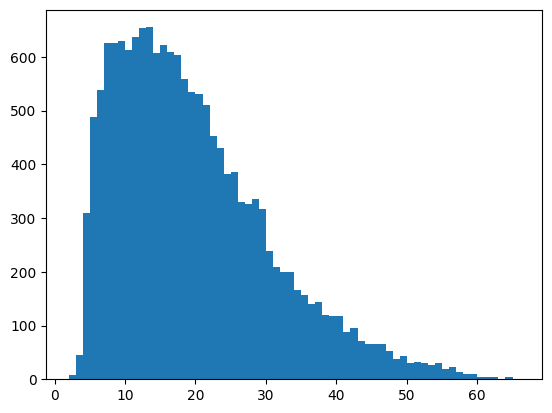

In [9]:
lengths = [len(t.split(' ')) for t in train_df['text']]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [12]:
padded_train_sequences = get_sequences(tokenizer, train_df['text'])

In [13]:
padded_train_sequences[10]

array([  2,   3,  14,   2,  21,   5,  80,   6, 733,   2,  93, 544, 304,
        84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## 6. Preparing the Labels

In [14]:
classes = set(train_df['label'])
print(classes)

{0, 1, 2, 3, 4, 5}


In [ ]:
emotion_map = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

In [ ]:
index_to_classes = {cls: emotion_map[cls] for cls in classes}

print(index_to_classes)

## 7. Creating the Model

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 8. Training the Model

In [17]:
#val_tweets, val_labels = get_tweets(val)
val_sequences = get_sequences(tokenizer, validation_df['text'])
#val_labels = names_to_ids(val_labels)

In [18]:
validation_df.iloc[[20]]

,text,label
20,i just know to begin with i am going to feel s...,4


In [19]:
h = model.fit(
    padded_train_sequences, train_df['label'],
    validation_data=(val_sequences, validation_df['label']),
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.3488 - loss: 1.5504 - val_accuracy: 0.6875 - val_loss: 0.8947
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7508 - loss: 0.7274 - val_accuracy: 0.7935 - val_loss: 0.5702
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8680 - loss: 0.4028 - val_accuracy: 0.8425 - val_loss: 0.4475
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9047 - loss: 0.2850 - val_accuracy: 0.8775 - val_loss: 0.3852
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9441 - loss: 0.1800 - val_accuracy: 0.8810 - val_loss: 0.3708
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9597 - loss: 0.1380 - val_accuracy: 0.8900 - val_loss: 0.3754
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9630 - loss: 0.1166 - val_accuracy: 0.8915 - val_loss: 0.3411
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9689 - loss: 0.0978 - val_a

## 9. Evaluating the Model

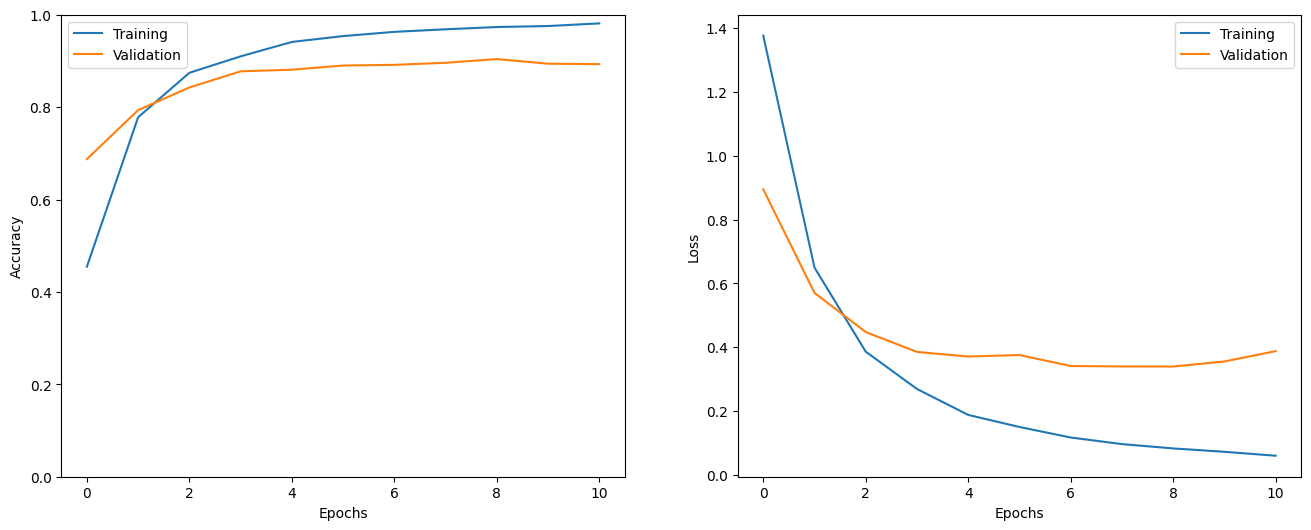

In [20]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

In [21]:
test_sequences = get_sequences(tokenizer, final_test_df['text'])

In [32]:
#test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_df['text'])
#test_labels = names_to_ids(test_labels)

In [22]:
predictions = model.predict(test_sequences)
predicted_classes = predictions.argmax(axis=1)
final_test_df['predicted_class'] = predicted_classes

final_test_df

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


,user_id,username,created_at,text,predicted_class
0,1003304113017409537,shraddhhaa13,2024-11-21 10:16:20+00:00,#colonisedincoloniserdominatedfields https://t...,3
1,1003304113017409537,shraddhhaa13,2024-11-20 19:24:48+00:00,I need a yap session so bad ILL EXPLODE,0
2,1003304113017409537,shraddhhaa13,2024-11-20 19:24:26+00:00,I wanna take a walk but I can't find my earpho...,3
3,1003304113017409537,shraddhhaa13,2024-11-20 19:07:50+00:00,Got happy for 1 second I hope you rot in hell ...,1
4,1003304113017409537,shraddhhaa13,2024-11-20 19:06:26+00:00,Throwing myself off the building https://t.co/...,3
...,...,...,...,...,...
108,1838827096052797440,chalkeat3r,2024-11-15 08:09:59+00:00,oh thats not.. https://t.co/fXOLZmudE3,1
109,1838827096052797440,chalkeat3r,2024-11-15 08:09:08+00:00,i love winter but winter hates me hella my ski...,3
110,1838827096052797440,chalkeat3r,2024-11-15 08:08:02+00:00,im such a loser but im the coolest loser in a ...,3
111,1838827096052797440,chalkeat3r,2024-11-15 08:07:30+00:00,"my daily routine: open instagram, check main a...",3


In [23]:
final_test_df.head(12)

,user_id,username,created_at,text,predicted_class
0,1003304113017409537,shraddhhaa13,2024-11-21 10:16:20+00:00,#colonisedincoloniserdominatedfields https://t...,3
1,1003304113017409537,shraddhhaa13,2024-11-20 19:24:48+00:00,I need a yap session so bad ILL EXPLODE,0
2,1003304113017409537,shraddhhaa13,2024-11-20 19:24:26+00:00,I wanna take a walk but I can't find my earpho...,3
3,1003304113017409537,shraddhhaa13,2024-11-20 19:07:50+00:00,Got happy for 1 second I hope you rot in hell ...,1
4,1003304113017409537,shraddhhaa13,2024-11-20 19:06:26+00:00,Throwing myself off the building https://t.co/...,3
5,1003304113017409537,shraddhhaa13,2024-11-20 19:06:12+00:00,Fuck it I'm gonna watch Nana and cry myself to...,1
6,1003304113017409537,shraddhhaa13,2024-11-20 19:06:07+00:00,Fuck this college fuck distance,1
7,1003304113017409537,shraddhhaa13,2024-11-20 19:02:19+00:00,This week is gonna be the worst week of my lif...,1
8,1003304113017409537,shraddhhaa13,2024-11-19 18:41:38+00:00,I wish I could talk to them all day,3
9,1003304113017409537,shraddhhaa13,2024-11-18 20:20:54+00:00,Saare chutiye mujhe hi kyu milte hai,1


In [33]:
eval = model.evaluate(test_sequences, final_test_df['label'])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9011 - loss: 0.3995


In [37]:
for a in range(0,5):
  i = random.randint(0, len(test_df['label']) - 1)

  print('Tweet:', test_df['text'][i])
  print('Actual Emotion:', index_to_classes[test_df['label'][i]])

  p = model.predict_classes(np.expand_dims(test_sequences[i], axis=0))[0]

  print('Predicted Emotion:', index_to_classes.get(p), '\n')

Tweet: i feel so lucky that i get to experience this joy at sssas every day
Actual Emotion: joy


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
preds = model.predict_classes(test_sequences)
preds.shape, test_labels.shape

((2000,), (2000,))

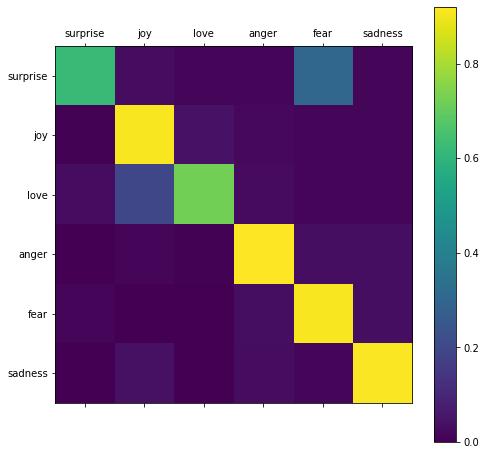

In [ ]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

show_confusion_matrix(test_labels, preds, list(classes))